In [8]:
from PIL import Image
import requests
from io import BytesIO

saskey = "sv=2021-06-08&ss=bfqt&srt=co&sp=rltfx&se=2022-07-30T03:07:34Z&st=2022-07-15T19:07:34Z&spr=https&sig=SgGQgoKGwnGSvZR%2BZviXoRB0wiKtiFlG6W8vsLhHlIU%3D"

url = "https://devstraicscussynth.blob.core.windows.net/80001641-c51b-4aa3-ac16-91031d1d58c6/6/6/9.jpg?"+saskey


im = Image.open(requests.get(url, stream=True).raw)


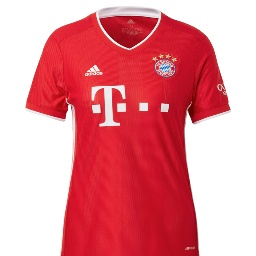

In [9]:
im

In [30]:
import pandas as pd
import requests
import os
from PIL import Image
from io import BytesIO
from pathlib import Path
import numpy as np

df = pd.read_csv("./data/4f3e7f32-4aba-449d-a277-e23fab876a0f_categories_18-11-22.csv")


In [31]:
tmp = df[["FileName","Url"]].drop_duplicates()

In [32]:
len(df)

306

In [33]:
len(tmp)

306

In [34]:
tmp["CropNum"] = tmp.groupby("FileName").cumcount().astype(str)
tmp["outfile"] = tmp.apply(lambda x: ("./data" / Path(x.FileName).with_suffix("") / (x.CropNum+".jpg")),axis=1).astype(str)

In [35]:
len(tmp)

306

In [36]:
crop_dirs = np.unique(np.array([str(Path(k).parent) for k in tmp.outfile.tolist()]))

In [42]:
_ = [os.makedirs(k, exist_ok=True) for k in crop_dirs]

In [43]:
from PIL import Image

In [44]:
Image.open("./data/tmp/traffic_data/2018-9-11/Almond at Julie North/2018-9-11-12-40.jpg")

UnidentifiedImageError: cannot identify image file './data/tmp/traffic_data/2018-9-11/Almond at Julie North/2018-9-11-12-40.jpg'

In [45]:
meh = pd.read_csv("./data/tmp/ref_4f3e7f32-4aba-449d-a277-e23fab876a0f_categories_18-11-22.csv")

In [47]:
meh.filename.tolist()[:10]

['/home/brian/synthetaic/raic-csv-parser/data/tmp/traffic_data/2018-9-16/IL 21 at Olde Half Day South/2018-9-16-12-0.jpg',
 '/home/brian/synthetaic/raic-csv-parser/data/tmp/traffic_data/2018-9-11/IL 21 at Aptakisic West/2018-9-11-10-20.jpg',
 '/home/brian/synthetaic/raic-csv-parser/data/tmp/traffic_data/2018-9-12/Delany at Porett South/2018-9-12-12-30.jpg',
 '/home/brian/synthetaic/raic-csv-parser/data/tmp/traffic_data/2018-9-12/IL 131 at IL 132 North/2018-9-12-8-40.jpg',
 '/home/brian/synthetaic/raic-csv-parser/data/tmp/traffic_data/2018-9-16/IL 22 at Riverwoods East/2018-9-16-14-50.jpg',
 '/home/brian/synthetaic/raic-csv-parser/data/tmp/traffic_data/2018-9-13/IL 21 at Aptakisic West/2018-9-13-15-20.jpg',
 '/home/brian/synthetaic/raic-csv-parser/data/tmp/traffic_data/2018-9-15/IL 21 at Aptakisic West/2018-9-15-13-20.jpg',
 '/home/brian/synthetaic/raic-csv-parser/data/tmp/traffic_data/2018-9-12/IL 22 at Riverwoods East/2018-9-12-15-0.jpg',
 '/home/brian/synthetaic/raic-csv-parser/data/

In [10]:
# print(Path(df.FileName))
Path(df.FileName.tolist()).with_suffix("")

TypeError: expected str, bytes or os.PathLike object, not list

In [7]:
url = df.Url.iloc[0]

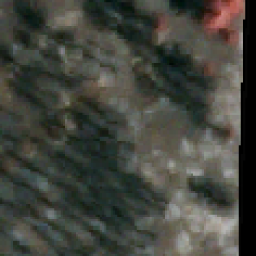

In [8]:
im = Image.open(requests.get(url, stream=True).raw)
im

In [ ]:

df.OriginalImageUrl = df.OriginalImageUrl.astype('str')
df["OriginalImageUrl"] = df.OriginalImageUrl.apply(lambda x: x.split("?", 1)[0])
df.OriginalImageUrl = df.OriginalImageUrl.str.replace("d50be0c6-9bd0-4159-aebb-240382a58f94","6c65128a-fa4a-4252-b507-e686323cd0bb")
df = df[["Category","X1","X2","Y1","Y2","FileName","OriginalImageUrl"]].rename(columns={"OriginalImageUrl":"Url"})

df.to_csv("./mod-d50be0c6-9bd0-4159-aebb-240382a58f94_categories_15-08-22.csv",index=False)
